In [1]:
import sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.layers import Reshape
from keras.models import load_model

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28))
X_test = X_test.reshape((X_test.shape[0], 28, 28))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


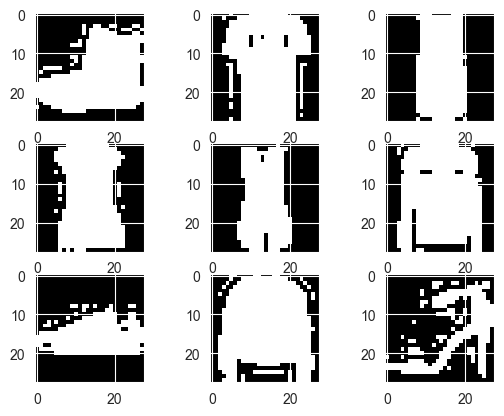

In [4]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [5]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.layers[0].trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x = X_train, y= y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 177s 86ms/step - loss: 0.5616 - accuracy: 0.8081
Epoch 2/10
1875/1875 [==============================] - 213s 113ms/step - loss: 0.4143 - accuracy: 0.8443
Epoch 3/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.3744 - accuracy: 0.8589
Epoch 4/10
1875/1875 [==============================] - 211s 113ms/step - loss: 0.3469 - accuracy: 0.8682
Epoch 5/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.3242 - accuracy: 0.8784
Epoch 6/10
1875/1875 [==============================] - 293s 156ms/step - loss: 0.3014 - accuracy: 0.8847
Epoch 7/10
1875/1875 [==============================] - 317s 169ms/step - loss: 0.2865 - accuracy: 0.8916
Epoch 8/10
1875/1875 [==============================] - 280s 149ms/step - loss: 0.2701 - accuracy: 0.8975
Epoch 9/10
1875/1875 [==============================] - 283s 151ms/step - loss: 0.2575 - accuracy: 0.9021
Epoch 10/10
1875/1875 [========================

In [8]:
model.save('NN/model_fashion_mnist_renet50.h5')

In [3]:
model_final = load_model('NN/model_fashion_mnist_renet50.h5')

result = model_final.evaluate(X_test, y_test)
print(result)

313/313 [==============================] - 25s 75ms/step - loss: 0.4264 - accuracy: 0.8584
[0.42638733983039856, 0.8583999872207642]
